In [1]:
!python -m pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00a 0:00:01


In [22]:
import pandas as pd
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt

In [10]:
# Read the original Muse2 recording file
df = pd.read_csv('PPG_recording_2024-03-06-10.35.39.csv')

# Extract each channel into separate DataFrames
ppg1_df = df[['PPG1']]
ppg2_df = df[['PPG2']]
ppg3_df = df[['PPG3']]

# Save each DataFrame into separate CSV files
ppg1_df.to_csv('PPG1.csv', index=False)
ppg2_df.to_csv('PPG2.csv', index=False)
ppg3_df.to_csv('PPG3.csv', index=False)


In [13]:
sample_rate = 64 # Hz for Muse2 

In [32]:
# Load the PPG data
df = pd.read_csv('PPG3.csv')

# Preprocess the PPG signal
ppg_signal = df['PPG3'].values

# Step 1: Subtract the mean to detrend the signal
ppg_detrended = ppg_signal - np.mean(ppg_signal)

# Step 2: Remove baseline wander
ppg_cleaned = hp.remove_baseline_wander(ppg_detrended, sample_rate)

# Step 3: Normalize the signal
ppg_normalized = (ppg_cleaned - np.mean(ppg_cleaned)) / np.std(ppg_cleaned)

# Step 4: Apply filtering if necessary
# ppg_filtered = hp.filter_signal(ppg_normalized, [0.7, 3.5], sample_rate=1000, filtertype='bandpass')

# Now, ppg_normalized contains the cleaned and preprocessed PPG signal ready for HRV analysis


/Users/vincenzosoragnese/anaconda3/envs/Muse/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1600x1200 with 0 Axes>

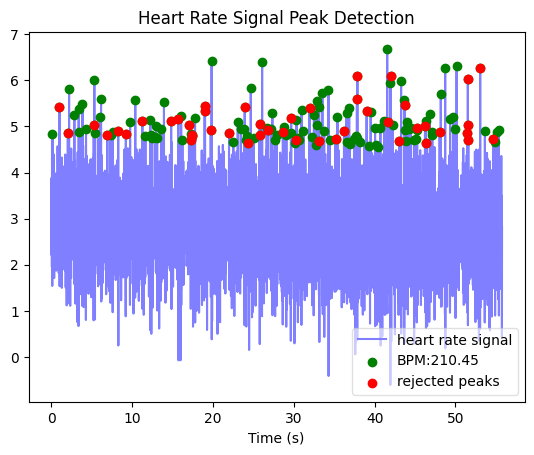

In [33]:
working_data, measures = hp.process(ppg_normalized, sample_rate) 
# working_data: working_data dict in which results are stored
# measures: measures dict in which results are stored

plt.figure(figsize=(16, 12))
hp.plotter(working_data, measures) # plotting function included in heartpy

plt.show

In [34]:
print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD (Root mean square of the successive differences) HRV measure

210.45045045045046
251.26060849713977
